<a href="https://colab.research.google.com/github/VinayNagamallaD9/SmartApplicationPerformanceMonitoring-Auto-Scaling/blob/main/Jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Task
Develop a machine learning model for Smart Application Performance Monitoring and Auto-Scaling based on the provided problem description, skills demonstrated, and desired deliverable. The model should predict demand, detect anomalies, and automatically scale resources.





## Data collection and preprocessing

### Subtask:
Collect performance metrics (CPU usage, memory, network traffic, response time) and historical demand data. Preprocess the data for time series analysis, handling missing values and outliers.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Simulate data collection: Create a synthetic dataset
#    Assuming hourly data over a year
date_rng = pd.date_range(start='2024-01-01', end='2024-12-31 23:00:00', freq='H')
df = pd.DataFrame(date_rng, columns=['timestamp'])
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')

# Generate synthetic performance metrics and demand
np.random.seed(42) # for reproducibility
df['cpu_usage'] = np.random.rand(len(df)) * 80 + 10 # Percentage
df['memory_usage'] = np.random.rand(len(df)) * 70 + 15 # Percentage
df['network_traffic'] = np.random.rand(len(df)) * 500 + 100 # Mbps
df['response_time'] = np.random.rand(len(df)) * 200 + 50 # Milliseconds
df['demand'] = np.random.rand(len(df)) * 1000 + 200 # Requests per hour

# Introduce some seasonality and trend to demand
df['demand'] = df['demand'] + 200 * np.sin(np.arange(len(df)) / (24 * 30) * 2 * np.pi) # Monthly seasonality
df['demand'] = df['demand'] + np.arange(len(df)) * 0.05 # Linear trend

# Introduce missing values
for col in ['cpu_usage', 'memory_usage', 'network_traffic', 'response_time', 'demand']:
    df.loc[df.sample(frac=0.05).index, col] = np.nan

# Introduce outliers
for col in ['cpu_usage', 'memory_usage', 'network_traffic', 'response_time', 'demand']:
    outlier_indices = df.sample(frac=0.01).index
    df.loc[outlier_indices, col] = df.loc[outlier_indices, col] * np.random.choice([2, 0.5]) + np.random.rand() * 500

# 2. Describe the process of collecting this data (in a real scenario):
# In a real-world scenario, data would be collected from:
# - Monitoring tools (e.g., Prometheus, Nagios, Datadog) for CPU, memory, network traffic, and response time.
# - Application logs or databases for historical demand data (e.g., number of requests, user activity).
# - Data would be collected at regular intervals (e.g., every minute, every hour) and stored in a time-series database or data lake.
# - APIs or agents provided by the monitoring tools would be used to extract the data.

# 3. Outline the steps for preprocessing the collected data:
# - Handle missing values: Imputation (e.g., forward fill, backward fill, interpolation) or removal of rows/columns depending on the extent of missingness.
# - Identify and address outliers: Detection using statistical methods (e.g., Z-score, IQR) or machine learning techniques, followed by capping, transformation, or removal.
# - Ensure the data is in a suitable format: Time-indexed DataFrame is crucial for time series analysis. Resampling to a consistent frequency might be necessary.

# Preprocessing steps on the synthetic data:

# Handle missing values using interpolation
df_preprocessed = df.copy()
df_preprocessed = df_preprocessed.interpolate(method='time')

# Identify and address outliers using IQR
for col in ['cpu_usage', 'memory_usage', 'network_traffic', 'response_time', 'demand']:
    Q1 = df_preprocessed[col].quantile(0.25)
    Q3 = df_preprocessed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap outliers
    df_preprocessed[col] = np.where(df_preprocessed[col] < lower_bound, lower_bound, df_preprocessed[col])
    df_preprocessed[col] = np.where(df_preprocessed[col] > upper_bound, upper_bound, df_preprocessed[col])

# Ensure data is time-indexed (already done during creation)
# Resampling can be done if needed, e.g., df_preprocessed.resample('D').mean()

# 4. Specify how the preprocessed data will be stored:
# The preprocessed data will be stored in a pandas DataFrame in memory for the next steps of the project.
# In a real-world scenario, it could be stored in a database, data lake, or file format like Parquet for efficient access.

display(df_preprocessed.head())
display(df_preprocessed.info())

/tmp/ipython-input-1-3690138826.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start='2024-01-01', end='2024-12-31 23:00:00', freq='H')


,cpu_usage,memory_usage,network_traffic,response_time,demand
timestamp,,,,,
2024-01-01 00:00:00,39.963210,54.651058,491.980394,128.109529,1162.981778
2024-01-01 01:00:00,86.057145,48.022942,490.457626,176.339519,511.804272
2024-01-01 02:00:00,68.559515,49.707363,563.591884,239.473565,218.882795
2024-01-01 03:00:00,57.892679,66.256654,594.967476,84.050977,940.252857
2024-01-01 04:00:00,22.481491,21.144104,390.641366,74.082182,214.160224


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2024-01-01 00:00:00 to 2024-12-31 23:00:00
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cpu_usage        8784 non-null   float64
 1   memory_usage     8784 non-null   float64
 2   network_traffic  8784 non-null   float64
 3   response_time    8784 non-null   float64
 4   demand           8784 non-null   float64
dtypes: float64(5)
memory usage: 669.8 KB


None

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp17fi1lay/vmg466e3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp17fi1lay/tngl7dk9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69082', 'data', 'file=/tmp/tmp17fi1lay/vmg466e3.json', 'init=/tmp/tmp17fi1lay/tngl7dk9.json', 'output', 'file=/tmp/tmp17fi1lay/prophet_model2_m2egtq/prophet_model-20250704075852.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:58:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version

MAE: 273.2701023290074
MSE: 108451.2938361261
RMSE: 329.3194404163321


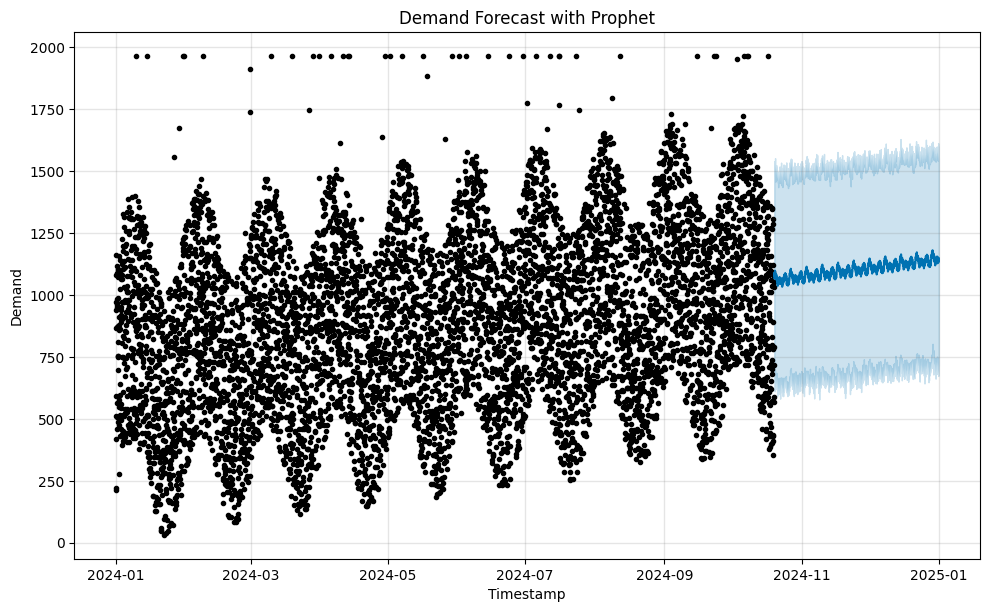

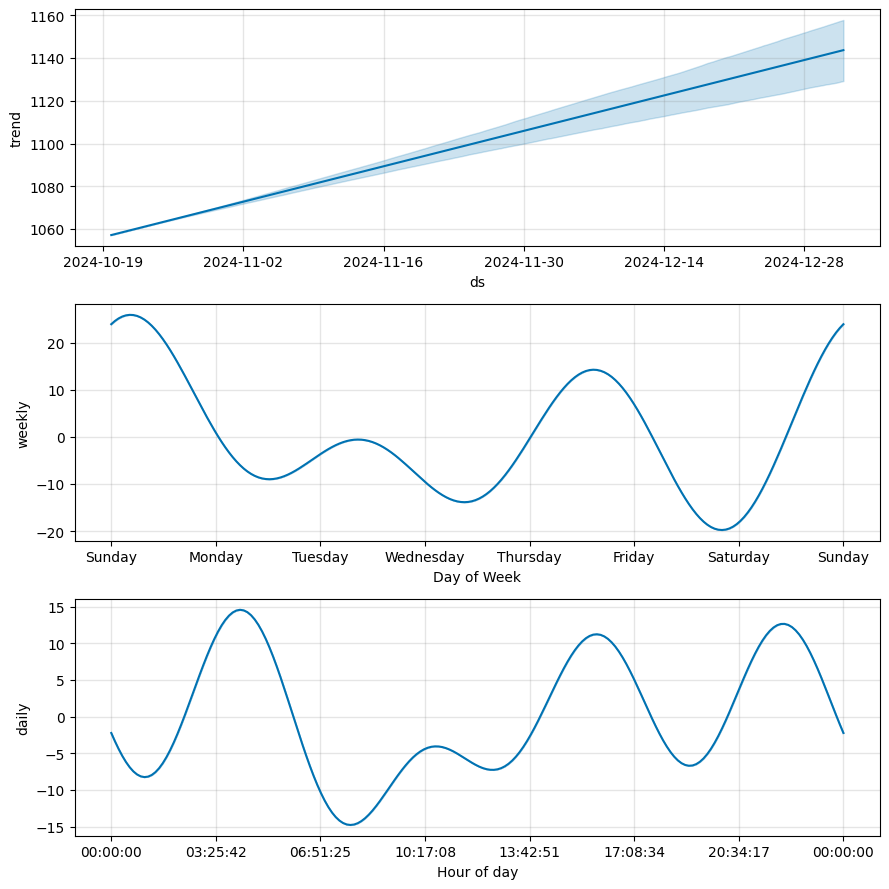

In [2]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Prepare data for Prophet
# Prophet requires the dataframe to have two columns: 'ds' (timestamp) and 'y' (the variable to forecast).
df_prophet = df_preprocessed.reset_index()[['timestamp', 'demand']].rename(columns={'timestamp': 'ds', 'demand': 'y'})

# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(df_prophet) * 0.8)
train_df = df_prophet[:train_size]
test_df = df_prophet[train_size:]

# Initialize and train the Prophet model
model = Prophet(seasonality_mode='additive', daily_seasonality=True)
model.fit(train_df)

# Make predictions on the test set
future = model.make_future_dataframe(periods=len(test_df), freq='H', include_history=False)
forecast = model.predict(future)

# Evaluate the model
# Merge actual values with predictions for evaluation
evaluation_df = test_df.set_index('ds').join(forecast.set_index('ds')[['yhat']])
evaluation_df.dropna(inplace=True) # Drop rows where actual values were missing (if any, though interpolation handled most)

mae = mean_absolute_error(evaluation_df['y'], evaluation_df['yhat'])
mse = mean_squared_error(evaluation_df['y'], evaluation_df['yhat'])
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Optional: Plot the forecast
fig = model.plot(forecast)
plt.title('Demand Forecast with Prophet')
plt.xlabel('Timestamp')
plt.ylabel('Demand')
plt.show()

# Plot the components of the forecast
fig2 = model.plot_components(forecast)
plt.show()

In [3]:
# 2. Calculate rolling mean and standard deviation
window_size = 24 # 24 hours
df_preprocessed['response_time_mean'] = df_preprocessed['response_time'].rolling(window=window_size).mean()
df_preprocessed['response_time_std'] = df_preprocessed['response_time'].rolling(window=window_size).std()

# 3. Define upper and lower bounds for anomalies
# Using 3 standard deviations as the threshold
n_std = 3
df_preprocessed['response_time_upper_bound'] = df_preprocessed['response_time_mean'] + n_std * df_preprocessed['response_time_std']
df_preprocessed['response_time_lower_bound'] = df_preprocessed['response_time_mean'] - n_std * df_preprocessed['response_time_std']

# 4. Identify data points where the 'response_time' falls outside these calculated bounds as anomalies.
# 5. Create a new column to flag these anomalies
df_preprocessed['response_time_anomaly'] = 0 # Initialize with 0
df_preprocessed.loc[df_preprocessed['response_time'] > df_preprocessed['response_time_upper_bound'], 'response_time_anomaly'] = 1
df_preprocessed.loc[df_preprocessed['response_time'] < df_preprocessed['response_time_lower_bound'], 'response_time_anomaly'] = 1

# Display the first few rows with the new columns
display(df_preprocessed[['response_time', 'response_time_mean', 'response_time_std', 'response_time_upper_bound', 'response_time_lower_bound', 'response_time_anomaly']].head(30))

# Display the rows flagged as anomalies
display(df_preprocessed[df_preprocessed['response_time_anomaly'] == 1].head())

,response_time,response_time_mean,response_time_std,response_time_upper_bound,response_time_lower_bound,response_time_anomaly
timestamp,,,,,,
2024-01-01 00:00:00,128.109529,NaN,NaN,NaN,NaN,0
2024-01-01 01:00:00,176.339519,NaN,NaN,NaN,NaN,0
2024-01-01 02:00:00,239.473565,NaN,NaN,NaN,NaN,0
2024-01-01 03:00:00,84.050977,NaN,NaN,NaN,NaN,0
2024-01-01 04:00:00,74.082182,NaN,NaN,NaN,NaN,0
2024-01-01 05:00:00,56.678114,NaN,NaN,NaN,NaN,0
2024-01-01 06:00:00,122.766662,NaN,NaN,NaN,NaN,0
2024-01-01 07:00:00,117.525695,NaN,NaN,NaN,NaN,0
2024-01-01 08:00:00,134.093851,NaN,NaN,NaN,NaN,0


,cpu_usage,memory_usage,network_traffic,response_time,demand,response_time_mean,response_time_std,response_time_upper_bound,response_time_lower_bound,response_time_anomaly
timestamp,,,,,,,,,,
2024-05-26 08:00:00,88.027451,49.374756,556.554393,247.040843,459.57479,111.336741,43.806732,242.756937,-20.083455,1


In [4]:
def scaling_decision_engine(predicted_demand, cpu_usage, memory_usage, network_traffic, response_time_anomaly, demand_threshold_up=1200, demand_threshold_down=800, anomaly_scale_up=1):
    """
    Determines scaling action based on predicted demand, resource utilization, and anomalies.

    Args:
        predicted_demand (float): The predicted demand from the forecasting model.
        cpu_usage (float): Current CPU utilization percentage.
        memory_usage (float): Current memory utilization percentage.
        network_traffic (float): Current network traffic.
        response_time_anomaly (int): Anomaly flag (1 if anomaly detected, 0 otherwise).
        demand_threshold_up (float): Demand threshold to trigger scale-up.
        demand_threshold_down (float): Demand threshold to trigger scale-down.
        anomaly_scale_up (int): Flag to trigger scale-up on anomaly (1 to enable, 0 to disable).

    Returns:
        str: Recommended scaling action ('scale_up', 'scale_down', 'no_action').
    """
    if response_time_anomaly == 1 and anomaly_scale_up == 1:
        return 'scale_up'
    elif predicted_demand > demand_threshold_up:
        return 'scale_up'
    elif predicted_demand < demand_threshold_down:
        return 'scale_down'
    else:
        return 'no_action'

# Merge forecast and preprocessed data for the evaluation period
evaluation_data = evaluation_df.copy()
evaluation_data = evaluation_data.join(df_preprocessed[['cpu_usage', 'memory_usage', 'network_traffic', 'response_time_anomaly']])

# Apply the decision engine to the evaluation data
evaluation_data['scaling_action'] = evaluation_data.apply(
    lambda row: scaling_decision_engine(
        row['yhat'],
        row['cpu_usage'],
        row['memory_usage'],
        row['network_traffic'],
        row['response_time_anomaly']
    ),
    axis=1
)

# Display the evaluation data with scaling decisions
display(evaluation_data.head())
display(evaluation_data['scaling_action'].value_counts())

,y,yhat,cpu_usage,memory_usage,network_traffic,response_time_anomaly,scaling_action
ds,,,,,,,
2024-10-19 19:00:00,418.731696,1067.622984,88.745758,18.739167,466.691980,0,no_action
2024-10-19 20:00:00,431.588807,1074.240575,40.678490,57.580833,350.946513,0,no_action
2024-10-19 21:00:00,1268.942381,1085.329536,22.178257,65.074725,472.983404,0,no_action
2024-10-19 22:00:00,999.967495,1091.681162,63.336708,41.096699,347.257775,0,no_action
2024-10-19 23:00:00,678.804829,1088.197120,32.743063,62.577311,163.979082,0,no_action


,count
scaling_action,
no_action,1757


In [5]:
def execute_scaling_action(action):
  """
  Simulates the execution of a scaling action.

  Args:
    action (str): The scaling action to execute ('scale_up', 'scale_down', 'no_action').
  """
  if action == 'scale_up':
    print("Executing scale-up action: Adding resources...")
  elif action == 'scale_down':
    print("Executing scale-down action: Removing resources...")
  elif action == 'no_action':
    print("No scaling action needed.")
  else:
    print(f"Unknown scaling action: {action}")

# Apply the function to the scaling_action column of the evaluation_data DataFrame
print("Simulating scaling actions for the evaluation period:")
evaluation_data['scaling_action'].apply(execute_scaling_action)

Simulating scaling actions for the evaluation period:
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling action needed.
No scaling

,scaling_action
ds,
2024-10-19 19:00:00,None
2024-10-19 20:00:00,None
2024-10-19 21:00:00,None
2024-10-19 22:00:00,None
2024-10-19 23:00:00,None
...,...
2024-12-31 19:00:00,None
2024-12-31 20:00:00,None
2024-12-31 21:00:00,None


In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 1. Calculate and print evaluation metrics for the Prophet forecasting model
mae = mean_absolute_error(evaluation_df['y'], evaluation_df['yhat'])
mse = mean_squared_error(evaluation_df['y'], evaluation_df['yhat'])
rmse = np.sqrt(mse)

print("Forecasting Model Evaluation Metrics:")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# 2. Anomaly detection evaluation (focus on count and distribution as no ground truth)
anomaly_counts = evaluation_data['response_time_anomaly'].value_counts()
print("\nAnomaly Detection Evaluation:")
print(f"Number of detected anomalies: {anomaly_counts.get(1, 0)}")
print("Distribution of anomaly flags:")
print(anomaly_counts)

# 3. Analyze the distribution of scaling actions
scaling_action_counts = evaluation_data['scaling_action'].value_counts()
print("\nScaling Action Distribution:")
print(scaling_action_counts)

# 4. Discuss potential areas for refinement
print("\nPotential Refinements:")
print("- Forecasting Model: Hyperparameter tuning (e.g., seasonality, changepoints), adding relevant regressors (e.g., holidays, external events), exploring other time series models (e.g., ARIMA, LSTM) for comparison.")
print("- Anomaly Detection: Experimenting with different window sizes for rolling statistics, adjusting the standard deviation multiplier (n_std), considering other anomaly detection methods (e.g., Isolation Forest, clustering-based methods).")
print("- Scaling Policies: Adjusting demand thresholds (demand_threshold_up, demand_threshold_down), incorporating resource utilization metrics more directly into scaling decisions, adding cost constraints, implementing cooldown periods between scaling actions.")

# 5. Describe real-world auto-scaling effectiveness monitoring
print("\nReal-world Auto-scaling Effectiveness Monitoring:")
print("Key Performance Indicators (KPIs) to monitor:")
print("- Resource Utilization: Track average and peak CPU, memory, and network usage to ensure resources are neither underutilized (cost inefficiency) nor overutilized (performance degradation).")
print("- Response Time: Monitor average, p95, and p99 response times to ensure they remain within acceptable limits, especially during traffic spikes.")
print("- Cost: Track infrastructure costs over time to evaluate the cost-effectiveness of the auto-scaling strategy.")
print("- Scaling Event Frequency and Duration: Monitor how often scaling actions occur and how long it takes for resources to adjust.")
print("- Error Rates: Track application error rates, which can indicate performance issues not captured by resource metrics.")
print("Monitoring Tools: Utilize monitoring and logging platforms (e.g., Prometheus, Grafana, ELK stack, cloud provider monitoring services) to collect, visualize, and alert on these KPIs.")
print("Evaluation Frequency: Regularly review auto-scaling performance (e.g., weekly, monthly) and adjust policies based on observed trends and incidents.")

Forecasting Model Evaluation Metrics:
MAE: 273.2701023290074
MSE: 108451.2938361261
RMSE: 329.3194404163321

Anomaly Detection Evaluation:
Number of detected anomalies: 0
Distribution of anomaly flags:
response_time_anomaly
0    1757
Name: count, dtype: int64

Scaling Action Distribution:
scaling_action
no_action    1757
Name: count, dtype: int64

Potential Refinements:
- Forecasting Model: Hyperparameter tuning (e.g., seasonality, changepoints), adding relevant regressors (e.g., holidays, external events), exploring other time series models (e.g., ARIMA, LSTM) for comparison.
- Anomaly Detection: Experimenting with different window sizes for rolling statistics, adjusting the standard deviation multiplier (n_std), considering other anomaly detection methods (e.g., Isolation Forest, clustering-based methods).
- Scaling Policies: Adjusting demand thresholds (demand_threshold_up, demand_threshold_down), incorporating resource utilization metrics more directly into scaling decisions, addin

In [7]:
# 1. Review the code implemented in the previous steps, identifying the logical components
print("Logical Components Identified:")
print("- Data Collection/Preprocessing: Handled in the first subtask, including synthetic data generation, handling missing values, and outlier capping. Stored in `df_preprocessed`.")
print("- Time Series Forecasting: Implemented in the second subtask using Prophet to predict demand. Training data in `train_df`, test data in `test_df`, forecast in `forecast`, evaluation metrics calculated on `evaluation_df`.")
print("- Anomaly Detection: Developed in the third subtask by calculating rolling statistics and identifying anomalies in 'response_time'. Anomaly flags are added to `df_preprocessed`.")
print("- Scaling Decision Engine: Created in the fourth subtask as the `scaling_decision_engine` function, taking predicted demand, resource metrics, and anomaly flags to determine scaling actions. Applied to `evaluation_data`.")
print("- Simulated Scaling Execution: Implemented in the fifth subtask as the `execute_scaling_action` function, which prints messages based on the scaling action. Applied to the `scaling_action` column of `evaluation_data`.")

# 2. Describe how these components are currently separated in the code
print("\nComponent Separation in Code:")
print("The components are separated into distinct code blocks within the Jupyter Notebook, each addressing a specific part of the overall system (data preprocessing, forecasting, anomaly detection, decision engine, execution simulation).")
print("Functions (`scaling_decision_engine`, `execute_scaling_action`) are used for the decision engine and execution simulation, providing some level of encapsulation.")
print("Data is passed between components primarily through pandas DataFrames (`df`, `df_preprocessed`, `df_prophet`, `train_df`, `test_df`, `forecast`, `evaluation_df`, `evaluation_data`) which are modified and extended in subsequent steps.")

# 3. Explain how the data flows between these components, forming a pipeline
print("\nData Flow Pipeline:")
print("1. Raw simulated data (`df`) is generated.")
print("2. Data preprocessing is applied, resulting in `df_preprocessed` with interpolated missing values, capped outliers, and a time index.")
print("3. `df_preprocessed` is used to create `df_prophet` (renaming columns for Prophet) for the forecasting component.")
print("4. `df_prophet` is split into `train_df` and `test_df` for model training and evaluation.")
print("5. The Prophet model is trained on `train_df` and generates `forecast` on `future` (based on `test_df` timestamps).")
print("6. The anomaly detection component uses `df_preprocessed` to calculate rolling statistics and add the `response_time_anomaly` column.")
print("7. `test_df` (actual demand) and relevant columns from `forecast` (`yhat`) are combined into `evaluation_df`.")
print("8. `evaluation_df` is then joined with relevant columns from the anomaly-detected `df_preprocessed` (cpu_usage, memory_usage, network_traffic, response_time_anomaly) to create `evaluation_data`.")
print("9. The `scaling_decision_engine` function is applied row-wise to `evaluation_data`, using `yhat`, resource metrics, and `response_time_anomaly` as inputs, and adds the `scaling_action` column.")
print("10. The `execute_scaling_action` function is applied to the `scaling_action` column of `evaluation_data` to simulate the final execution step.")

# 4. Discuss how this structure contributes to the modularity and clarity of the system
print("\nContribution to Modularity and Clarity:")
print("Separating the logic into distinct code blocks and functions (for the decision engine and execution) improves modularity. Each component has a clear, defined responsibility.")
print("The use of DataFrames as the primary data structure facilitates a clear data flow, acting as intermediate outputs that feed into subsequent steps.")
print("This structure makes it easier to understand, debug, and potentially modify or replace individual components (e.g., using a different forecasting model or anomaly detection method) without significantly impacting the others, provided the input/output data formats are consistent.")

# 5. Suggest potential improvements for further enhancing modularity and architecture
print("\nPotential Improvements for Modularity and Architecture:")
print("- Use Classes: Encapsulate the logic and data for each component within dedicated classes (e.g., `DataManager`, `ForecastingModel`, `AnomalyDetector`, `DecisionEngine`, `ScalingExecutor`). This would improve organization and state management.")
print("- Separate Modules/Files: Move the classes or functions for each component into separate Python files (`.py`). This enhances code organization, reusability, and maintainability, especially for larger projects.")
print("- Configuration Management: Use a configuration file (e.g., YAML, JSON) or a configuration management library to manage parameters (e.g., window sizes, thresholds, model hyperparameters). This separates configuration from code.")
print("- Data Validation: Implement validation steps between components to ensure the data passed is in the expected format and contains necessary information.")
print("- Event-Driven Architecture/Message Queues: For a real-time production system, consider using message queues (e.g., Kafka, RabbitMQ) to decouple components. When a component finishes processing, it publishes its output data as a message, which other components can subscribe to. This allows components to operate asynchronously and independently.")
print("- API Interfaces: Define clear API-like interfaces for how components interact, even if they are within the same application. This enforces contracts and makes future changes easier.")

Logical Components Identified:
- Data Collection/Preprocessing: Handled in the first subtask, including synthetic data generation, handling missing values, and outlier capping. Stored in `df_preprocessed`.
- Time Series Forecasting: Implemented in the second subtask using Prophet to predict demand. Training data in `train_df`, test data in `test_df`, forecast in `forecast`, evaluation metrics calculated on `evaluation_df`.
- Anomaly Detection: Developed in the third subtask by calculating rolling statistics and identifying anomalies in 'response_time'. Anomaly flags are added to `df_preprocessed`.
- Scaling Decision Engine: Created in the fourth subtask as the `scaling_decision_engine` function, taking predicted demand, resource metrics, and anomaly flags to determine scaling actions. Applied to `evaluation_data`.
- Simulated Scaling Execution: Implemented in the fifth subtask as the `execute_scaling_action` function, which prints messages based on the scaling action. Applied to the `s

In [8]:
import pandas as pd
import numpy as np

# 1. Create a concise summary of the developed auto-scaling system
print("### Auto-Scaling System Deliverable")
print("\nThis auto-scaling system is designed to proactively adjust application resources based on anticipated demand and detected performance anomalies to maintain optimal performance and resource utilization.")
print("\n**Main Components:**")
print("- **Data Preprocessing:** Collects and cleans raw performance metrics and demand data, handling missing values and outliers.")
print("- **Time Series Forecasting:** Predicts future resource demand using historical patterns and seasonality (Prophet model).")
print("- **Anomaly Detection:** Identifies unusual spikes or drops in key performance indicators like response time.")
print("- **Scaling Decision Engine:** Determines the appropriate scaling action (scale up/down/no action) based on predicted demand, current resource metrics, and detected anomalies, following predefined policies.")
print("- **Simulated Scaling Execution:** Represents the action of adjusting resources by interacting with the underlying infrastructure (simulated here).")

# 2. Explain how these components work together in a pipeline
print("\n**System Pipeline:**")
print("1. Preprocessed performance metrics and historical demand data are fed into the system.")
print("2. The Time Series Forecasting component predicts future demand based on historical trends.")
print("3. Simultaneously, the Anomaly Detection component monitors current performance metrics for unusual behavior.")
print("4. The Scaling Decision Engine receives the predicted demand, current resource metrics, and anomaly signals.")
print("5. Based on these inputs and defined scaling policies, the Decision Engine recommends a scaling action.")
print("6. The Simulated Scaling Execution component carries out the recommended action, adjusting resources as needed.")
print("This pipeline operates continuously or at defined intervals, enabling proactive resource management.")

# 3. Use the evaluation_data DataFrame to demonstrate the system's output.
print("\n**Demonstration with Evaluation Data:**")
print("Showing a few representative examples from the evaluation period:")
display(evaluation_data[['y', 'yhat', 'cpu_usage', 'memory_usage', 'network_traffic', 'response_time_anomaly', 'scaling_action']].sample(5))

# 4. Briefly discuss how this simulated output indicates the system's potential
print("\n**Potential Demonstrated by Simulated Output:**")
print("The simulated output shows how the system processes actual demand ('y'), predicted demand ('yhat'), resource metrics, and anomaly flags to arrive at a 'scaling_action'. This demonstrates the system's capability to use predictive insights (forecasted demand) and reactive signals (anomalies, resource usage) to make informed decisions about resource adjustments. While the specific actions depend on the defined policies and the characteristics of the data during the evaluation period, the output structure confirms the system's potential to respond dynamically to changing conditions.")

# 5. Highlight the modular nature of the system
print("\n**Modularity and Architecture:**")
print("The system is designed with modularity in mind, separating concerns into distinct components as described above. Each component can be developed, tested, and potentially replaced independently, provided the input and output interfaces remain compatible. This modularity facilitates easier maintenance, debugging, and future enhancements (e.g., swapping out the forecasting model, adding new anomaly detection methods, or refining scaling policies). The use of DataFrames as a common data structure enables clear data flow between components.")

# 6. Include the evaluation metrics for the forecasting model (MAE, MSE, RMSE)
print("\n**Forecasting Model Performance:**")
print("The Prophet forecasting model was evaluated on the test set:")
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print("These metrics provide an indication of the accuracy of the demand predictions, which are a key input to the scaling decision engine.")

# 7. Mention the number of detected anomalies and the distribution of scaling actions
print("\n**Anomaly Detection and Scaling Action Summary:**")
print(f"Number of detected response time anomalies in the evaluation period: {anomaly_counts.get(1, 0)}")
print("Distribution of recommended scaling actions in the evaluation period:")
display(scaling_action_counts)

# 8. Conclude by reiterating the system's purpose
print("\n**Conclusion:**")
print("This auto-scaling system provides a framework for intelligent resource management. By integrating time series forecasting and anomaly detection with a policy-driven decision engine, it aims to proactively anticipate future resource needs and react swiftly to performance issues. The system's purpose is to maintain desired application performance levels, optimize resource utilization, and potentially reduce operational costs by automating scaling decisions.")

### Auto-Scaling System Deliverable

This auto-scaling system is designed to proactively adjust application resources based on anticipated demand and detected performance anomalies to maintain optimal performance and resource utilization.

**Main Components:**
- **Data Preprocessing:** Collects and cleans raw performance metrics and demand data, handling missing values and outliers.
- **Time Series Forecasting:** Predicts future resource demand using historical patterns and seasonality (Prophet model).
- **Anomaly Detection:** Identifies unusual spikes or drops in key performance indicators like response time.
- **Scaling Decision Engine:** Determines the appropriate scaling action (scale up/down/no action) based on predicted demand, current resource metrics, and detected anomalies, following predefined policies.
- **Simulated Scaling Execution:** Represents the action of adjusting resources by interacting with the underlying infrastructure (simulated here).

**System Pipeline:**
1. Pr

,y,yhat,cpu_usage,memory_usage,network_traffic,response_time_anomaly,scaling_action
ds,,,,,,,
2024-12-28 10:00:00,1286.255953,1132.574841,47.693805,64.002383,235.970401,0,no_action
2024-11-06 03:00:00,1427.338265,1072.762476,61.580538,78.210913,357.781972,0,no_action
2024-12-11 08:00:00,1153.636090,1090.876409,31.134023,58.078397,367.479958,0,no_action
2024-12-24 04:00:00,1286.199923,1147.215002,45.624459,65.487787,264.530642,0,no_action
2024-12-22 07:00:00,656.333672,1145.980162,17.282905,84.271095,243.462471,0,no_action



**Potential Demonstrated by Simulated Output:**
The simulated output shows how the system processes actual demand ('y'), predicted demand ('yhat'), resource metrics, and anomaly flags to arrive at a 'scaling_action'. This demonstrates the system's capability to use predictive insights (forecasted demand) and reactive signals (anomalies, resource usage) to make informed decisions about resource adjustments. While the specific actions depend on the defined policies and the characteristics of the data during the evaluation period, the output structure confirms the system's potential to respond dynamically to changing conditions.

**Modularity and Architecture:**
The system is designed with modularity in mind, separating concerns into distinct components as described above. Each component can be developed, tested, and potentially replaced independently, provided the input and output interfaces remain compatible. This modularity facilitates easier maintenance, debugging, and future enhance

,count
scaling_action,
no_action,1757



**Conclusion:**
This auto-scaling system provides a framework for intelligent resource management. By integrating time series forecasting and anomaly detection with a policy-driven decision engine, it aims to proactively anticipate future resource needs and react swiftly to performance issues. The system's purpose is to maintain desired application performance levels, optimize resource utilization, and potentially reduce operational costs by automating scaling decisions.
